# Visualizations

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("cleaned_data_manhattan_rentals_08122024.csv")

In [3]:
df.shape

(3120, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3120 entries, 0 to 3119
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Asking Price    3120 non-null   int64 
 1   Days on Market  3120 non-null   int64 
 2   Sub-Nbhood      3120 non-null   object
 3   Location        3120 non-null   object
 4   Unit Type       3120 non-null   object
dtypes: int64(2), object(3)
memory usage: 122.0+ KB


In [5]:
df

Asking Price  Days on Market                    Sub-Nbhood  \
0             2500               6  West Harlem & Manhattanville   
1             3100              17  West Harlem & Manhattanville   
2             2650              20  West Harlem & Manhattanville   
3             2645              22  West Harlem & Manhattanville   
4             5400              59  West Harlem & Manhattanville   
...            ...             ...                           ...   
3115          6000              57          South Street Seaport   
3116          7300              59          South Street Seaport   
3117          4450              77          South Street Seaport   
3118          4995              82          South Street Seaport   
3119          3650              99          South Street Seaport   

             Location Unit Type  
0     Upper Manhattan    Studio  
1     Upper Manhattan      2 BR  
2     Upper Manhattan      1 BR  
3     Upper Manhattan    Studio  
4     Upper Manhattan      2 BR  
...               ...       ...  
3115    Downtown East      1 BR  
3116    Downtown East      2 BR  
3117    Downtown East      1 BR  
3118    Downtown East      1 BR  
3119    Downtown East      1 BR  

[3120 rows x 5 columns]

In [6]:
df.describe()

Asking Price  Days on Market
count   3120.000000     3120.000000
mean    5392.683013       29.915385
std     2747.422984       25.617990
min      750.000000        1.000000
25%     3500.000000       10.000000
50%     4500.000000       23.000000
75%     6500.000000       45.000000
max    15295.000000      111.000000

In [7]:
import plotly.express as px
import plotly.graph_objects as go
import plotly.colors as pc

# I will use go and the bargap
# Go and bargap will help to see the bar charts not to thick, previously they were to thick
# Colors later to apply sequential colors palette

- marker_color with import plotly.graph_objects as go
- color_discrete_sequence=['#00BFFF'] with import plotly.express as px

# Average Rental Prices by Unit Type

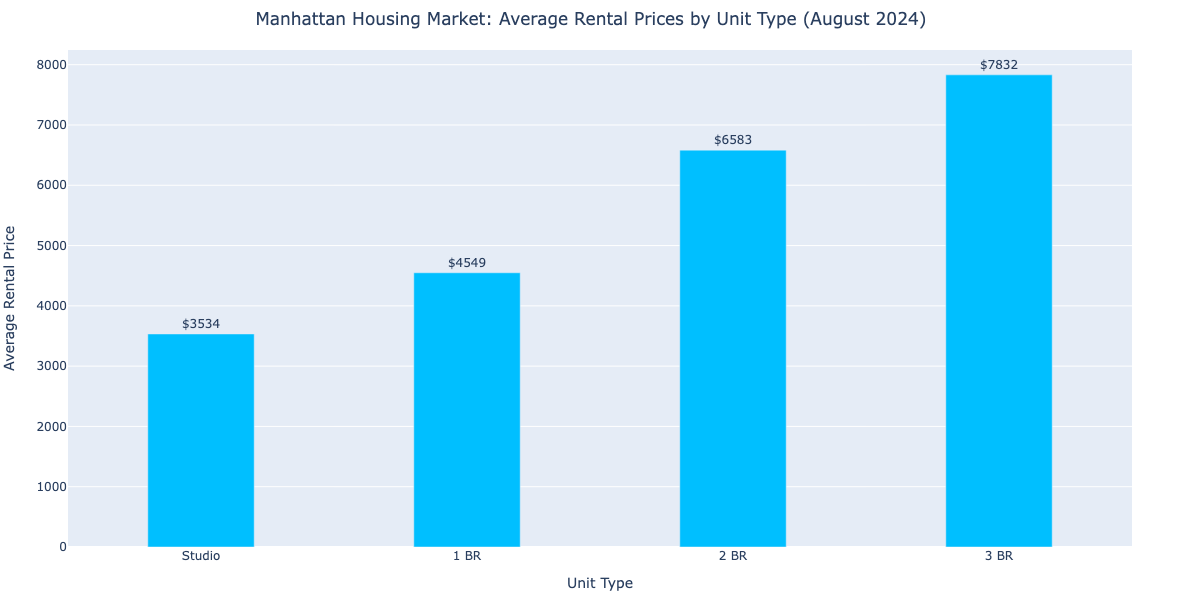

In [8]:
# Calculate the average asking price by unit type
avg_price_per_unit = df.groupby('Unit Type')['Asking Price'].mean().reset_index()

# Sort values by Asking Price in ascending order
avg_price_per_unit = avg_price_per_unit.sort_values(by='Asking Price', ascending=True)

# Create the bar plot
fig = go.Figure(data=[go.Bar(
    x=avg_price_per_unit['Unit Type'],
    y=avg_price_per_unit['Asking Price'],
    text=avg_price_per_unit['Asking Price'],
    texttemplate='$%{text:.0f}',
    textposition='outside',
    width=0.4,  # Adjust the width here
    marker_color='#00BFFF'  # Set the color for all bars (Deep Sky Blue)
)])

# Update layout to center the title
fig.update_layout(
    title={
        'text': 'Manhattan Housing Market: Average Rental Prices by Unit Type (August 2024)',
        'x': 0.5,  # Center the title horizontally
        'xanchor': 'center'  # Anchor the title in the center
    },
    xaxis_title='Unit Type',
    yaxis_title='Average Rental Price',
    width=900,
    height=600,
    margin=dict(l=50, r=50, t=50, b=50)
)

# Show the plot
fig.show()

# Average Rental Price by Location

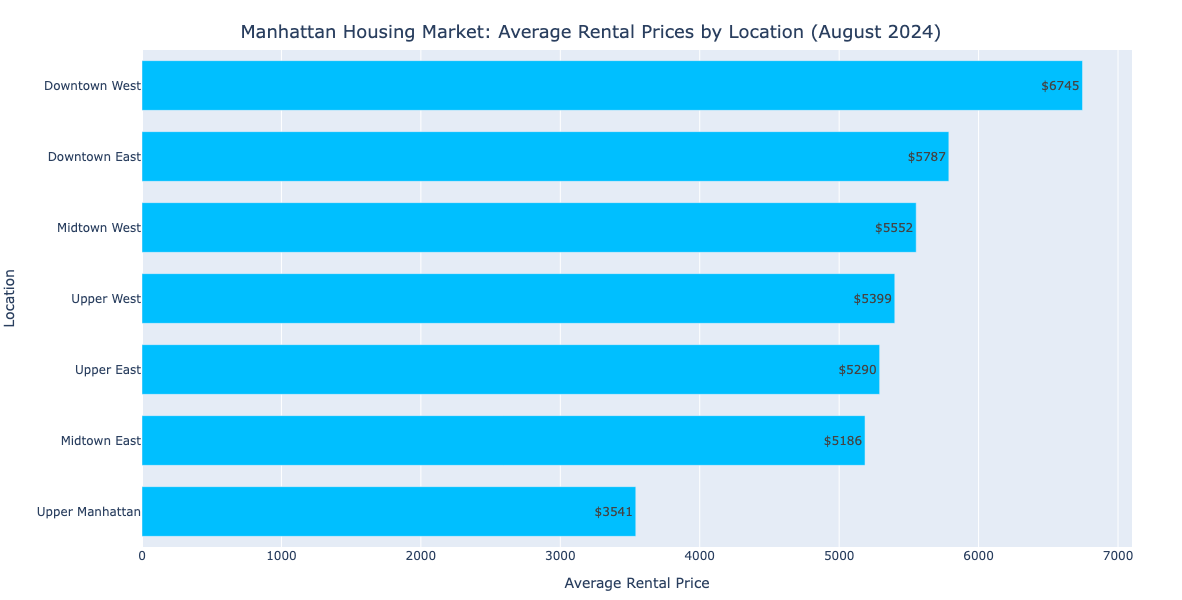

In [9]:
# Calculate the average asking price by location
avg_price_per_location = df.groupby('Location')['Asking Price'].mean().reset_index()

# Sort the DataFrame by Asking Price in descending order
avg_price_per_location = avg_price_per_location.sort_values(by='Asking Price', ascending=False)

# Define the order of locations based on sorted DataFrame
location_order = avg_price_per_location['Location'].tolist()

# Create the horizontal bar plot
fig = px.bar(
    avg_price_per_location,
    y='Location',  # Locations on the y-axis
    x='Asking Price',  # Average Asking Prices on the x-axis
    text='Asking Price',  # Labels will show average asking prices
    title='Manhattan Housing Market: Average Rental Prices by Location (August 2024)',
    category_orders={'Location': location_order},
    labels={'Asking Price': 'Average Asking Price'},
    color_discrete_sequence=['#00BFFF']  # Set the color for all bars (Deep Sky Blue)
)

# Update layout to show text labels inside the bars
fig.update_traces(
    texttemplate='$%{text:.0f}', 
    textposition='inside'
)

# Update layout to center the title and adjust bar thickness
fig.update_layout(
    title={
        'text': 'Manhattan Housing Market: Average Rental Prices by Location (August 2024)',
        'x': 0.5,  # Center the title horizontally
        'xanchor': 'center',  # Anchor the title in the center
        'yanchor': 'top',  # Anchor the title at the top
        'font': {'size': 18}  # Adjust the font size if needed
    },
    xaxis_title='Average Rental Price',
    yaxis_title='Location',
    width=900,  # Set the desired width
    height=600,  # Set the desired height
    bargap=0.3,  # Adjust the gap between bars to control thickness
    margin=dict(l=50, r=50, t=50, b=50)  # Adjust margins if needed
)

# Show the plot
fig.show()

- Selected horizontal to make a diference with the chart of Unit Type
- To make it more clear for the audience

# Median Rental Price by Unit Type

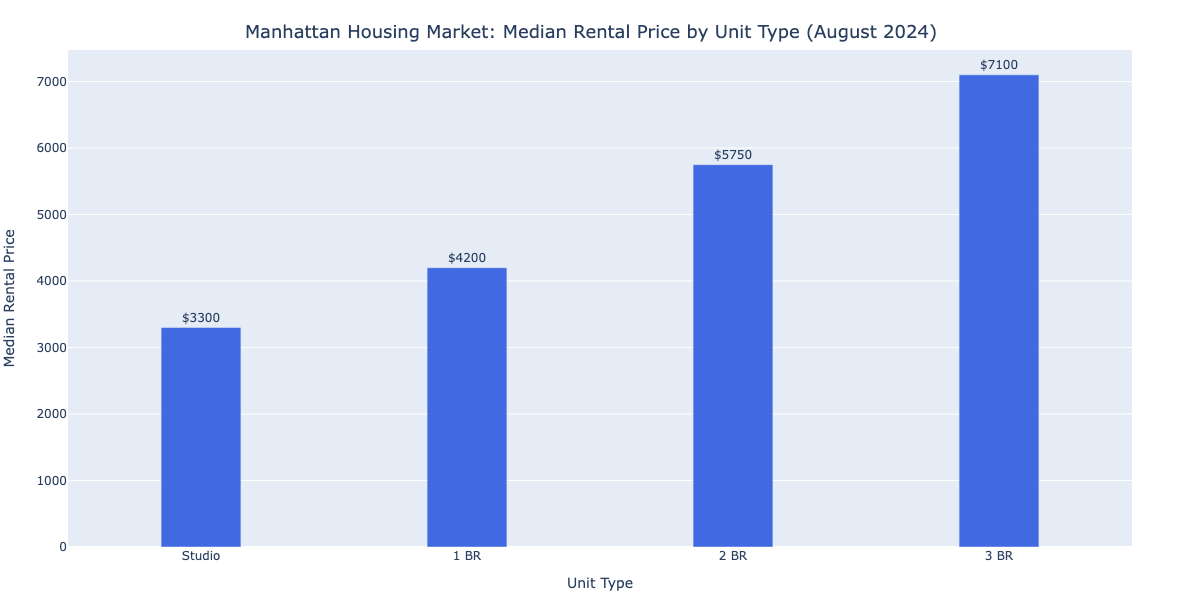

In [10]:
import plotly.graph_objects as go

# Calculate the median asking price by unit type
median_price_per_unit = df.groupby('Unit Type')['Asking Price'].median().reset_index()

# Sort the df by Median Asking Price in ascending order
median_price_per_unit = median_price_per_unit.sort_values(by='Asking Price')

# Create the bar plot
fig = go.Figure(data=[go.Bar(
    x=median_price_per_unit['Unit Type'],
    y=median_price_per_unit['Asking Price'],
    text=median_price_per_unit['Asking Price'],
    texttemplate='$%{text:.0f}',
    textposition='outside',
    width=0.3,  # Adjust the width here to make bars thinner
    marker_color='#4169E1'  # Set the color for the bars (Royal Blue)
)])

# Update layout to center the title and adjust bar thickness
fig.update_layout(
    title={
        'text': 'Manhattan Housing Market: Median Rental Price by Unit Type (August 2024)',
        'x': 0.5,  # Center the title horizontally
        'xanchor': 'center',  # Anchor the title in the center
        'yanchor': 'top',  # Anchor the title at the top
        'font': {'size': 18}  # Adjust the font size if needed
    },
    xaxis_title='Unit Type',
    yaxis_title='Median Rental Price',
    width=900,  # Set the desired width
    height=600,  # Set the desired height
    margin=dict(l=50, r=50, t=50, b=50),  # Adjust margins if needed
    bargap=0.4  # Adjust the gap between bars to control thickness
)

# Show the plot
fig.show()

# Median Rental Price by Location

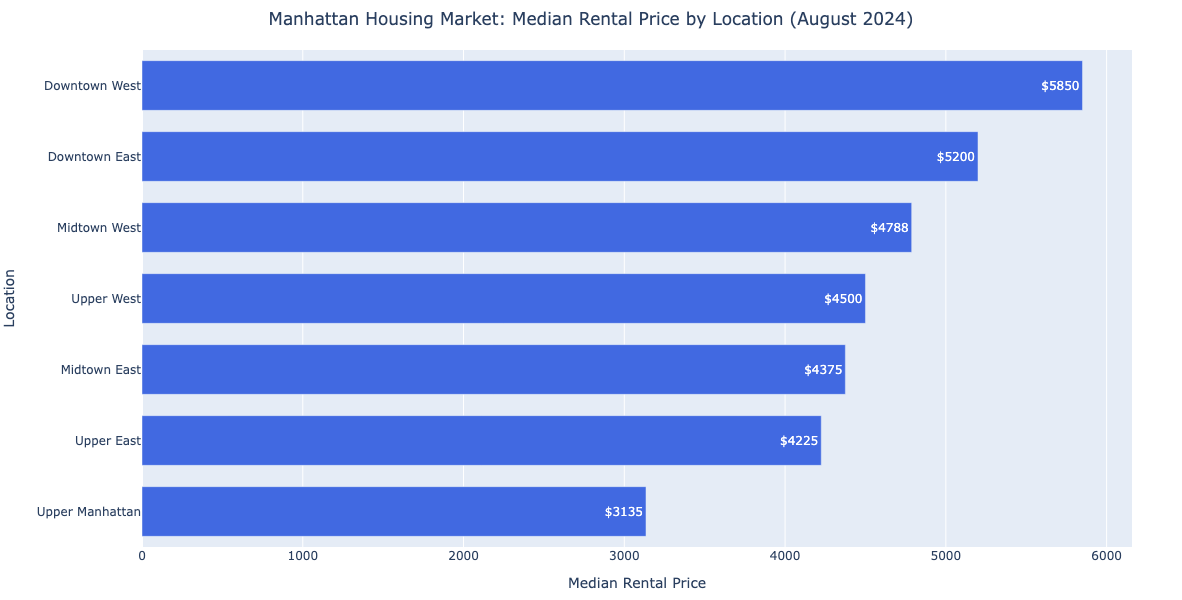

In [11]:
# Calculate the median asking price by location
median_price_per_location = df.groupby('Location')['Asking Price'].median().reset_index()

# Sort the DataFrame by Asking Price in descending order
median_price_per_location = median_price_per_location.sort_values(by='Asking Price', ascending=False)

# Define the order of locations based on the sorted DataFrame
location_order = median_price_per_location['Location'].tolist()

# Create the horizontal bar plot
fig = px.bar(
    median_price_per_location,
    y='Location',  # Locations on the y-axis
    x='Asking Price',  # Median asking prices on the x-axis
    text='Asking Price',  # Labels will show median asking prices
    title='Manhattan Housing Market: Median Rental Price by Location (August 2024)',
    category_orders={'Location': location_order},
    labels={'Asking Price': 'Median Rental Price'},
    color_discrete_sequence=['#4169E1']  # Set the color for the bars (Royal Blue)
)

# Update traces to show text labels inside the bars
fig.update_traces(texttemplate='$%{text:.0f}', textposition='inside')

# Adjust the width and height of the chart and center the title
fig.update_layout(
    title={
        'text': 'Manhattan Housing Market: Median Rental Price by Location (August 2024)',
        'x': 0.5,  # Center the title horizontally
        'xanchor': 'center'  # Anchor the title in the center
    },
    xaxis_title='Median Rental Price',  # X-axis title
    yaxis_title='Location',  # Y-axis title
    width=900,  # Set the desired width
    height=600,  # Set the desired height
    bargap=0.3,  # Adjust the gap between bars to make them thinner
    margin=dict(l=50, r=50, t=50, b=50)  # Adjust margins if needed
)

# Show the plot
fig.show()

# Average Days on Market by Location

In [12]:
# Calculate the average days on market per location
avg_days_per_location = df.groupby('Location')['Days on Market'].mean().reset_index()

# Sort the DataFrame by Average Days on Market in ascending order
avg_days_per_location = avg_days_per_location.sort_values(by='Days on Market')

# Define the order of locations based on sorted DataFrame
location_order = avg_days_per_location['Location'].tolist()

# Define the Slate Gray color
light_sky_blue = '#1E90FF'

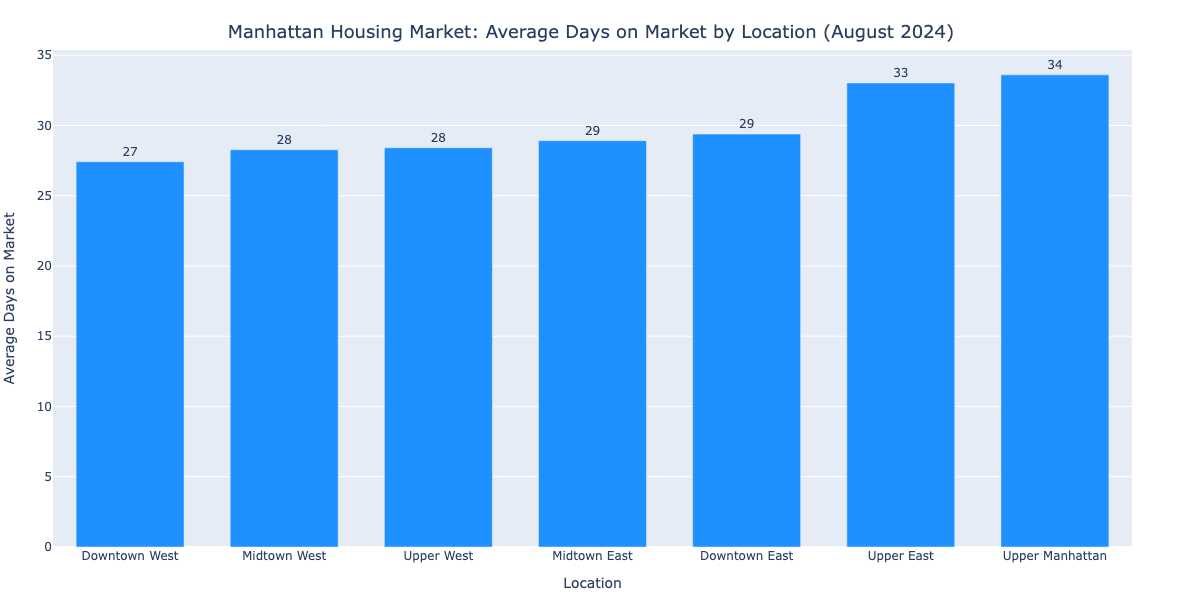

In [13]:
# Create the bar plot
fig = px.bar(
    avg_days_per_location,
    x='Location',
    y='Days on Market', 
    text='Days on Market',  # Labels will show average days on market
    title='Manhattan Housing Market: Average Days on Market by Location (August 2024)',
    category_orders={'Location': location_order},
    labels={'Days on Market': 'Average Days on Market'},
    color_discrete_sequence=[light_sky_blue]  # Use Slate Gray color
)

# Update layout to show text labels on top of bars
fig.update_traces(texttemplate='%{text:.0f}', textposition='outside')

# Adjust the width and height of the chart and center the title
fig.update_layout(
    title={
        'text': 'Manhattan Housing Market: Average Days on Market by Location (August 2024)',
        'x': 0.5,  # Center the title horizontally
        'xanchor': 'center',  # Anchor the title in the center
        'yanchor': 'top',  # Anchor the title at the top
        'font': {'size': 18}  # Adjust the font size if needed
    },
    xaxis_title='Location',
    yaxis_title='Average Days on Market',
    width=1000,  # Set the desired width
    height=600,  # Set the desired height
    bargap=0.3,  # Adjust the gap between bars to make them thinner
    margin=dict(l=50, r=50, t=50, b=50)  # Adjust margins if needed
)

# Show the plot
fig.show()

# Average Days on Market by Unit Type

In [14]:
# Calculate the average days on market per unit type
avg_days_per_unit = df.groupby('Unit Type')['Days on Market'].mean().reset_index()

# Sort the DataFrame by Average Days on Market in ascending order
avg_days_per_unit = avg_days_per_unit.sort_values(by='Days on Market')

# Define the order of unit types based on sorted DataFrame
unit_type_order = avg_days_per_unit['Unit Type'].tolist()

# Define the Slate Gray color
light_sky_blue = '#1E90FF'

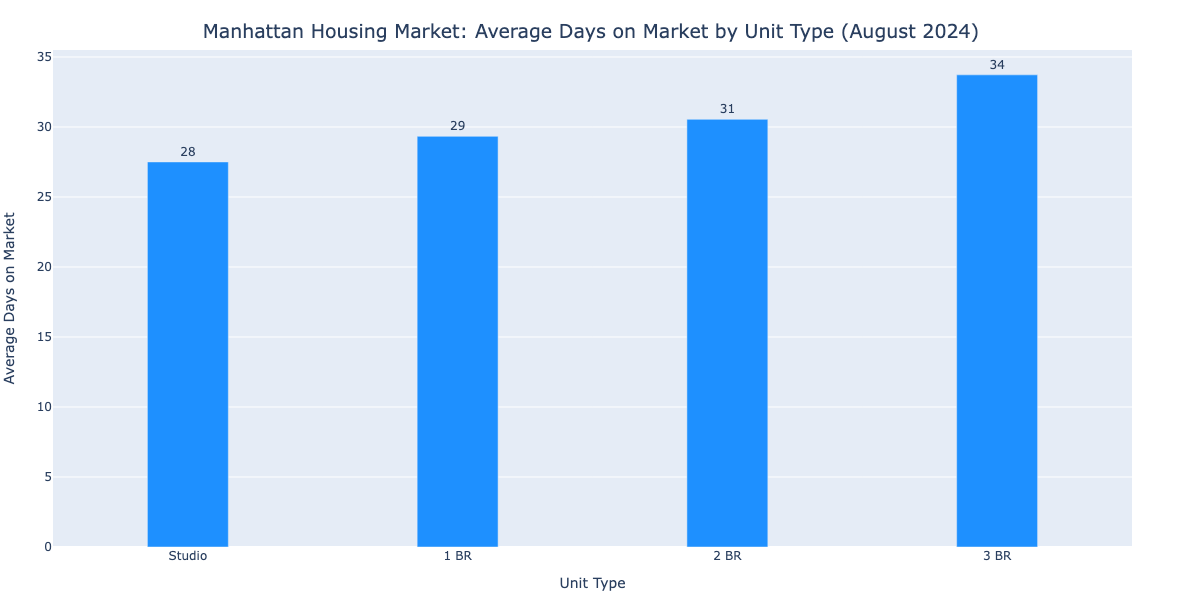

In [15]:
# Create the bar plot
fig = go.Figure(data=[go.Bar(
    x=avg_days_per_unit['Unit Type'],
    y=avg_days_per_unit['Days on Market'],
    text=avg_days_per_unit['Days on Market'],
    texttemplate='%{text:.0f}',
    textposition='outside',
    marker_color=light_sky_blue,  # Use Slate Gray color
    width=0.3  # Adjust the width here to make bars thinner
)])

# Update layout to center the title and adjust bar thickness
fig.update_layout(
    title={
        'text': 'Manhattan Housing Market: Average Days on Market by Unit Type (August 2024)',
        'x': 0.5,  # Center the title horizontally
        'xanchor': 'center',  # Anchor the title in the center
        'yanchor': 'top',  # Anchor the title at the top
        'font': {'size': 19}  # Adjust the font size if needed
    },
    xaxis_title='Unit Type',
    yaxis_title='Average Days on Market',
    width=1000,  # Set the desired width
    height=600,  # Set the desired height
    bargap=0.4,  # Increase the gap between bars to make them thinner
    margin=dict(l=50, r=50, t=50, b=50)  # Adjust margins if needed
)

# Show the plot
fig.show()

# Scatter Plot - average
### To compare relationship between average rental price and average days on market

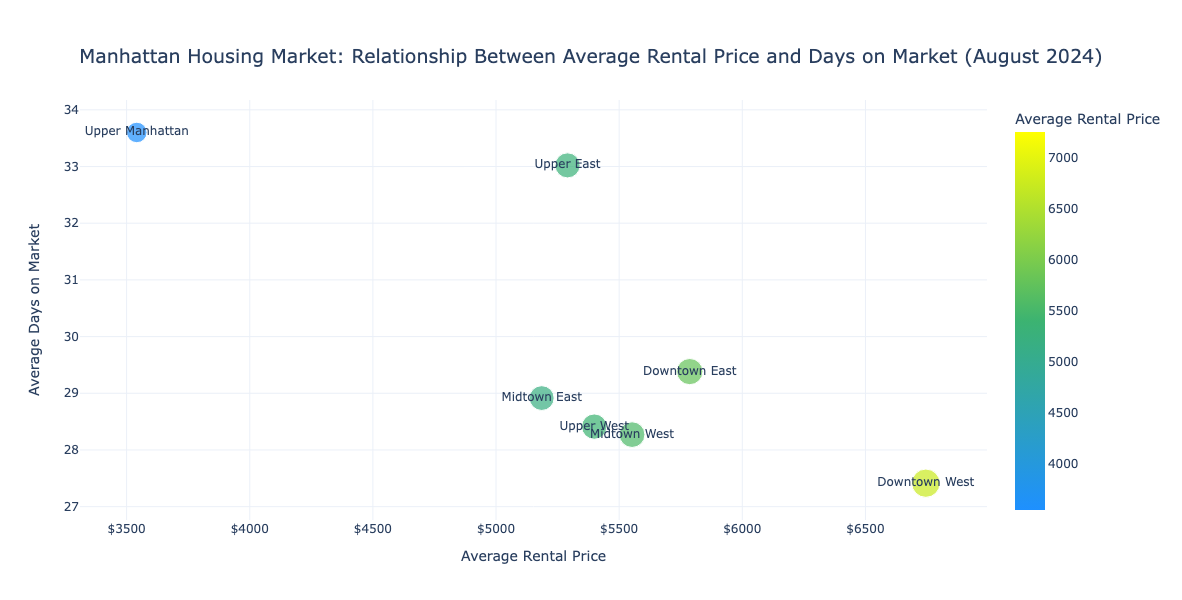

In [16]:
import plotly.express as px

# Calculate the average asking price and average days on market by location
summary = df.groupby('Location').agg(
    Average_Price=('Asking Price', 'mean'),
    Average_Days=('Days on Market', 'mean')
).reset_index()

# Define the custom color scale from a less vibrant blue to green to yellow
custom_color_scale = [
    [0, '#1E90FF'],      # Less vibrant blue (Light Sky Blue)
    [0.5, '#3CB371'],      # Mid value (green in the middle)
    [1, 'yellow']        # Low value (yellow at high end of scale)
]

# Create the scatter plot
fig = px.scatter(
    summary,
    x='Average_Price',
    y='Average_Days',
    text='Location',  # Add location names as text labels
    title='Manhattan Housing Market: Relationship Between Average Rental Price and Days on Market (August 2024)',
    labels={'Average_Price': 'Average Rental Price', 'Average_Days': 'Average Days on Market'},
    color='Average_Price',  # Use color to represent average asking price
    color_continuous_scale=custom_color_scale,  # Use the custom color scale
    color_continuous_midpoint=summary['Average_Price'].median(),  # Center the color scale at the median price
    size='Average_Price',  # Use size to represent average asking price
    size_max=20,  # Maximum size for the largest points
    template='plotly_white'  # Clean white background for better readability
)

# Update layout for better readability
fig.update_layout(
    width=1200,  # Set the desired width
    height=600,  # Set the desired height
    title=dict(
        text='Manhattan Housing Market: Relationship Between Average Rental Price and Days on Market (August 2024)',
        x=0.5,  # Center title horizontally
        xanchor='center',
        yanchor='top',
        font=dict(size=19)  # Adjust font size if needed
    ),
    xaxis=dict(
        title='Average Rental Price',
        tickprefix='$',  # Format x-axis labels with a dollar sign
        showgrid=True
    ),
    yaxis=dict(
        title='Average Days on Market',
        showgrid=True
    )
)

# Show the plot
fig.show()

# Scatter Plot - Median
### To compare relationship between median rental price and average days on market

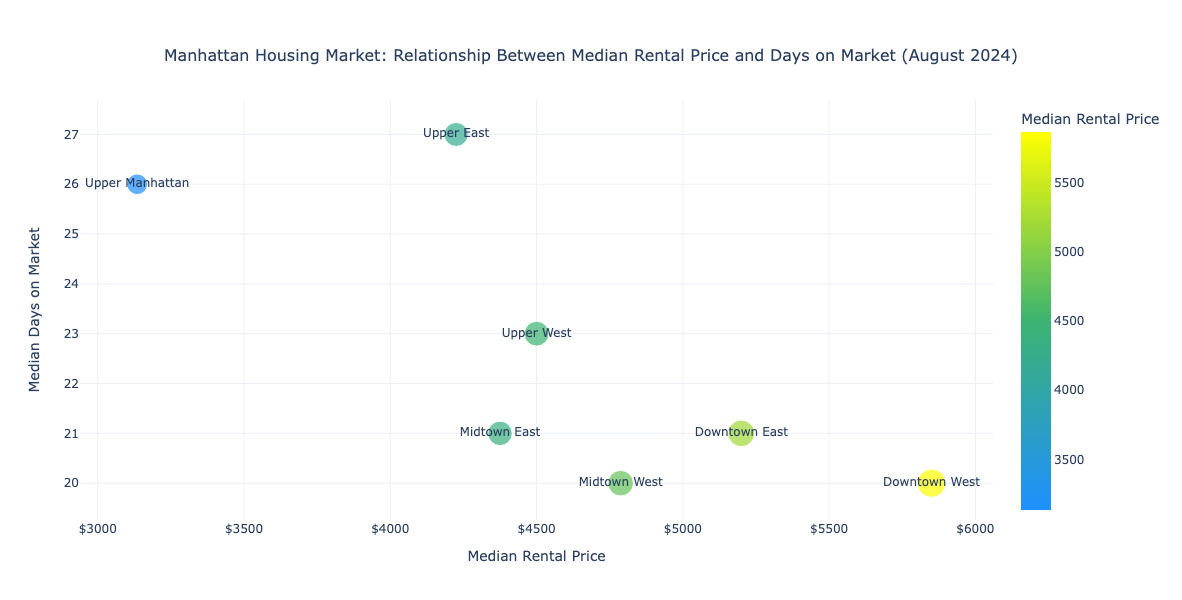

In [17]:
import plotly.express as px

# Calculate the median asking price and median days on market by location
summary = df.groupby('Location').agg(
    Median_Price=('Asking Price', 'median'),
    Median_Days=('Days on Market', 'median')
).reset_index()

# Define the custom color scale from a less vibrant blue to green to yellow
custom_color_scale = [
    [0, '#1E90FF'],      # Less vibrant blue (Light Sky Blue)
    [0.5, '#3CB371'],      # Mid value (green in the middle)
    [1, 'yellow']        # Low value (yellow at high end of scale)
]

# Create the scatter plot
fig = px.scatter(
    summary,
    x='Median_Price',
    y='Median_Days',
    text='Location',  # Add location names as text labels
    title='Manhattan Housing Market: Relationship Between Median Rental Price and Days on Market (August 2024)',
    labels={'Median_Price': 'Median Rental Price', 'Median_Days': 'Median Days on Market'},
    color='Median_Price',  # Use color to represent median asking price
    color_continuous_scale=custom_color_scale,  # Use the custom color scale
    color_continuous_midpoint=summary['Median_Price'].median(),  # Center the color scale at the median price
    size='Median_Price',  # Use size to represent median asking price
    size_max=20,  # Maximum size for the largest points
    template='plotly_white'  # Clean white background for better readability
)

# Update layout for better readability
fig.update_layout(
    width=1200,  # Set the desired width
    height=600,  # Set the desired height
    title=dict(
        text='Manhattan Housing Market: Relationship Between Median Rental Price and Days on Market (August 2024)',
        x=0.5,  # Center title horizontally
        xanchor='center',
        yanchor='top',
        font=dict(size=16)  # Adjust font size if needed
    ),
    xaxis=dict(
        title='Median Rental Price',
        tickprefix='$',  # Format x-axis labels with a dollar sign
        showgrid=True
    ),
    yaxis=dict(
        title='Median Days on Market',
        showgrid=True
    )
)

# Show the plot
fig.show()

- Continuing in Tableau, to do a table with heatmap colors.